# **HW 1**

In [1]:
from re import L
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pandas as pd
import csv

In [2]:
xyz_curves = "/content/cieXYZ_curves.csv"
csvfile = pd.read_csv(xyz_curves)
print(csvfile)

# print(csvfile.iloc[:, 0])

lambda_x = csvfile.iloc[:, 1]

for value in lambda_x:
    print(value)

     λ (nm)         X         Y         Z
0       370  0.000415  0.000012  0.001946
1       371  0.000464  0.000014  0.002178
2       372  0.000519  0.000016  0.002436
3       373  0.000582  0.000017  0.002732
4       374  0.000655  0.000020  0.003078
..      ...       ...       ...       ...
356     726  0.001911  0.000690  0.000000
357     727  0.001781  0.000643  0.000000
358     728  0.001660  0.000599  0.000000
359     729  0.001546  0.000558  0.000000
360     730  0.001440  0.000520  0.000000

[361 rows x 4 columns]
0.0004149
0.00046416
0.00051899
0.00058185
0.00065523
0.0007416
0.00084503
0.00096453
0.0010949
0.0012312
0.001368
0.001502
0.0016423
0.0018024
0.0019958
0.002236
0.0025354
0.0028926
0.0033008
0.0037532
0.004243
0.0047624
0.00533
0.0059787
0.0067411
0.00765
0.0087514
0.010029
0.011422
0.012869
0.01431
0.015704
0.017147
0.018781
0.020748
0.02319
0.026207
0.029782
0.033881
0.038468
0.04351
0.048996
0.055023
0.061719
0.069212
0.07763
0.086958
0.097177
0.10841
0.12077
0.1

## **Step 1**

In [3]:
h = 6.62606957e-34
c = 299792458
k_B = 1.3806488e-23

temps = np.linspace(1000, 30000, 291)

lambda_nm = csvfile.iloc[:, 0]
lambda_x = csvfile.iloc[:, 1]
lambda_y = csvfile.iloc[:, 2]
lambda_z = csvfile.iloc[:, 3]

# Μετατροπή nm -> m
lambda_m = lambda_nm.to_numpy() * 1e-9

def planck_radiance(lambda_m, T):
    return 2*h*c**2 / ((lambda_m**5) * (np.exp((h*c)/(lambda_m*k_B*T)) - 1))  # B_T(λ) for every λ

# Υπολογισμός (X, Y, Z) με διακριτό άθροισμα
def XYZ_calc(T):
    B = planck_radiance(lambda_m, T)
    step_of_L_m = lambda_nm[1]-lambda_nm[0]
    X = np.sum(B * lambda_x)*step_of_L_m
    Y = np.sum(B * lambda_y)*step_of_L_m
    Z = np.sum(B * lambda_z)*step_of_L_m
    return X, Y, Z

## **Step 2**

In [4]:
Curves_x_y = []
curves_x = []
curves_y = []
curves_T = []
for T in temps:
    X, Y, Z = XYZ_calc(T)
    # print(f"for T = {T} K, the X = {X}, Y = {Y}, Z = {Z}")

    # Κανονικοποίηση σε (x, y)
    s = (X + Y + Z)
    x = X / s
    y = Y / s

    print(f"for T = {T} K, the x = {x}, y = {y}")

    # c = round(1000*x)
    # r = round(1000*y)
    # Curves_x_y.append([c, r])

    curves_x.append(round(1000*x))
    curves_y.append(round(1000*y))
    curves_T.append(T)

for T = 1000.0 K, the x = 0.6523413858499999, y = 0.3448570469551401
for T = 1100.0 K, the x = 0.6384235973516813, y = 0.3568138670024908
for T = 1200.0 K, the x = 0.6247675534144013, y = 0.36771248360297154
for T = 1300.0 K, the x = 0.6113955671677884, y = 0.3774468858904452
for T = 1400.0 K, the x = 0.5983167915152183, y = 0.3859690051637531
for T = 1500.0 K, the x = 0.5855383735435254, y = 0.39327542891656253
for T = 1600.0 K, the x = 0.5730698427460342, y = 0.39939681233131624
for T = 1700.0 K, the x = 0.5609238096271422, y = 0.4043889858596502
for T = 1800.0 K, the x = 0.5491149420391223, y = 0.40832536859881213
for T = 1900.0 K, the x = 0.5376583821881212, y = 0.4112905616914951
for T = 2000.0 K, the x = 0.5265682245781023, y = 0.4133750754300079
for T = 2100.0 K, the x = 0.5158563329099753, y = 0.4146711387418444
for T = 2200.0 K, the x = 0.5055315737765947, y = 0.41526950737546897
for T = 2300.0 K, the x = 0.4955994394001119, y = 0.4152571558444536
for T = 2400.0 K, the x = 0.4

## **Step 3**

### 3.1 Using Colour

In [5]:
!pip install colour-science colour-demosaicing
!pip install colour-demosaicing

import colour

from colour_demosaicing import (
    demosaicing_CFA_Bayer_bilinear,
    demosaicing_CFA_Bayer_Malvar2004,
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)

colour.plotting.colour_style();
colour.utilities.describe_environment();

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 77.3 MB/s eta 0:00:00
*                                                                             *
*   Interpreter :                                                             *
*       python : 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]           *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.4.6                                                        *
*       colour-demosaicing : 0.2.6                                            *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.37.0                      

/usr/local/lib/python3.11/dist-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028


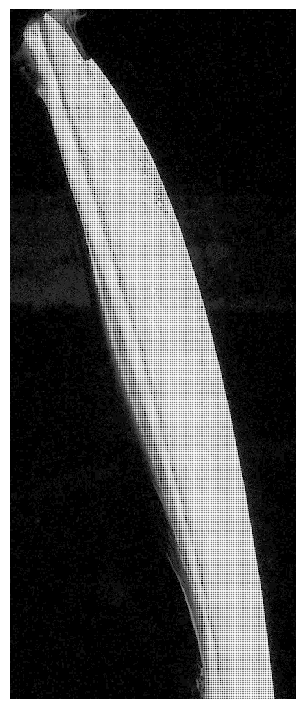

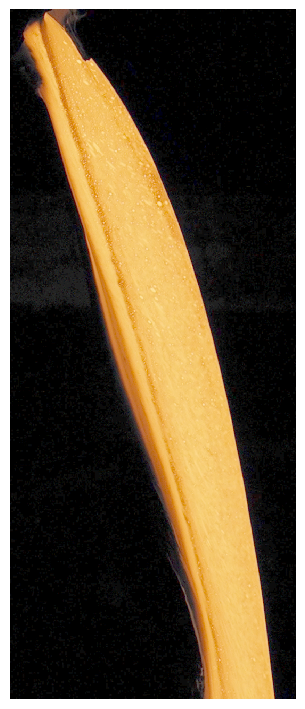

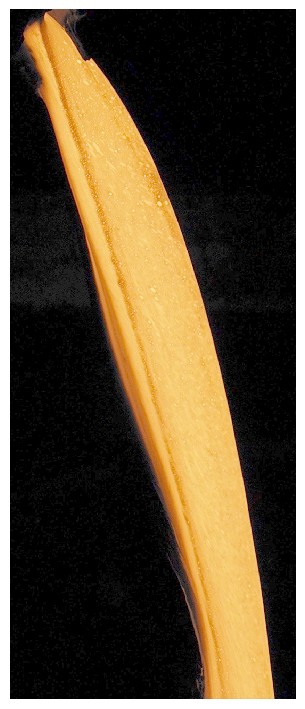

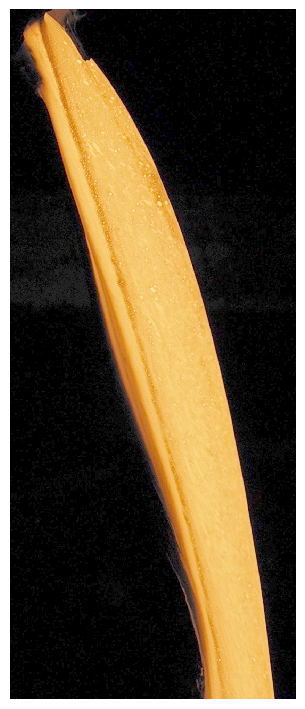

In [8]:
CFA = colour.io.read_image('CFA_stream.png')

colour.plotting.plot_image(
    colour.cctf_encoding(CFA))


colour.plotting.plot_image(
    colour.cctf_encoding(demosaicing_CFA_Bayer_bilinear(CFA, 'GBRG')));


colour.plotting.plot_image(
    colour.cctf_encoding(demosaicing_CFA_Bayer_Malvar2004(CFA, 'GBRG')));

image_rgb_colour = colour.cctf_encoding(demosaicing_CFA_Bayer_Menon2007(CFA, 'GBRG'))

colour.plotting.plot_image(image_rgb_colour);

# height, width = CFA.shape
# print(height)
# cv2_imshow(CFA)

### 3.2 Using Opencv

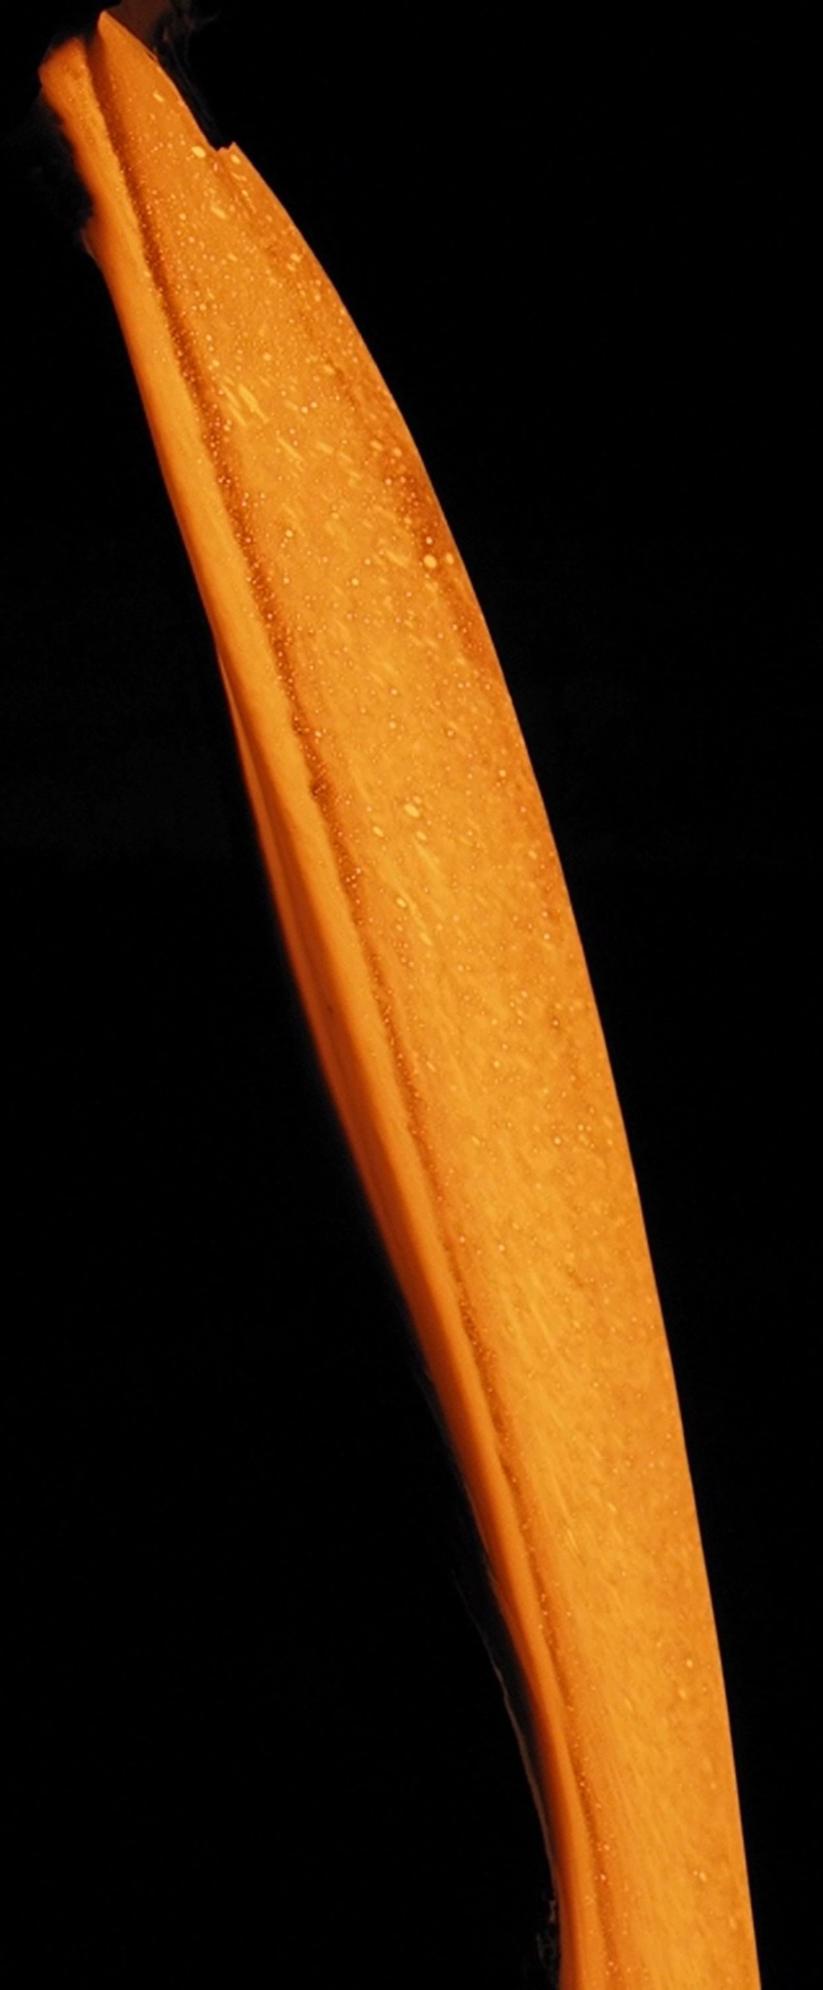

In [10]:
# image = cv2.imread('CFA_stream.png')
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.imread('CFA_stream.png',cv2.IMREAD_GRAYSCALE)

image_demosaiced = cv2.cvtColor(image_gray, cv2.COLOR_BayerGR2RGB) # COLOR_BayerGB2RGB
image_rgb_cv = image_demosaiced
image_gbr = cv2.cvtColor(image_rgb_cv, cv2.COLOR_RGB2BGR)

cv2_imshow(image_gbr)

## **Step 4**

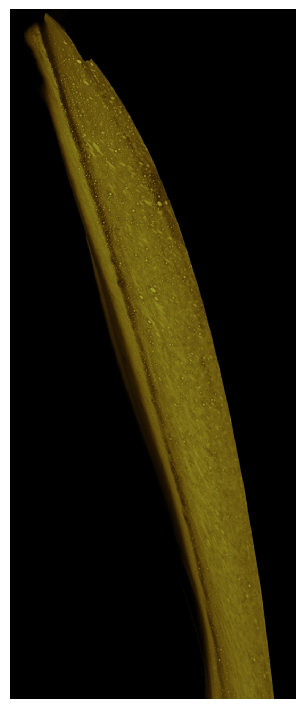

0.687115999754


In [11]:
img_rgb = image_rgb_cv.astype(np.float32) / 255.0 # Η colour διαβαζει το rgb οχι το bgr image

image_xyz = colour.models.sRGB_to_XYZ(img_rgb)

# image_xyz = colour.models.sRGB_to_XYZ(image_rgb)

colour.plotting.plot_image(image_xyz);
print(np.max(image_xyz))

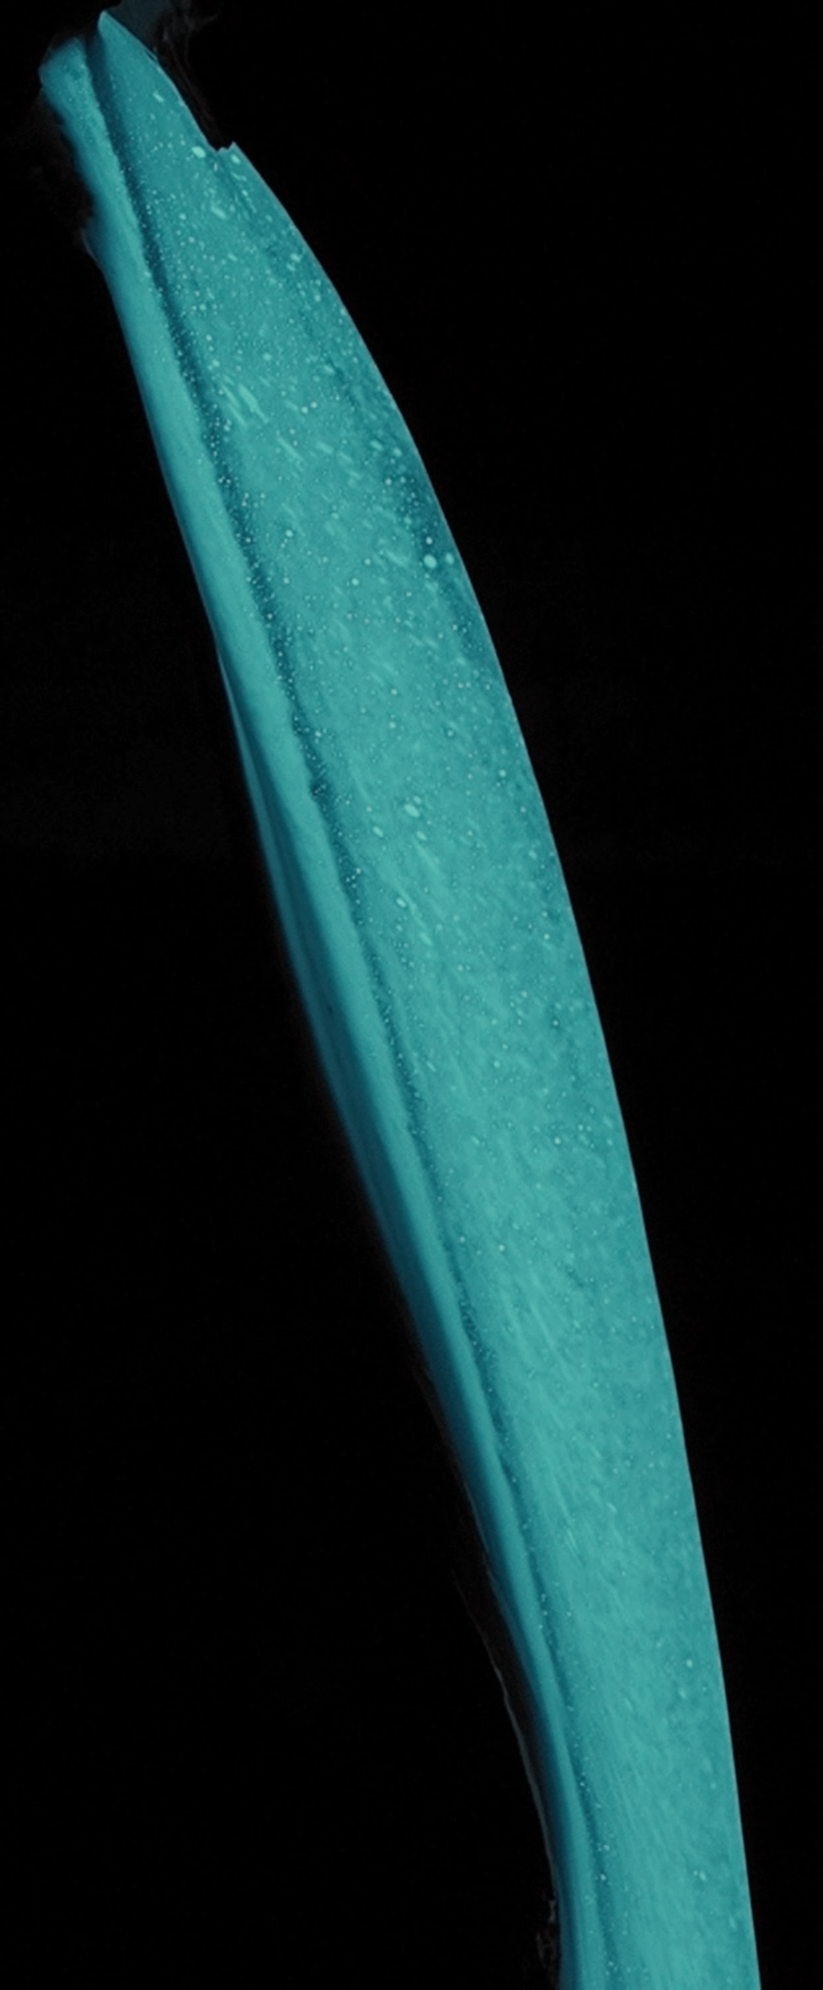

In [12]:
image_xyz_cv = cv2.cvtColor(image_rgb_cv, cv2.COLOR_RGB2XYZ)
cv2_imshow(image_xyz_cv) # in GBR

## **Step 5**

Μέσο RGB: [ 64.19059331  37.1118582    9.66606605]


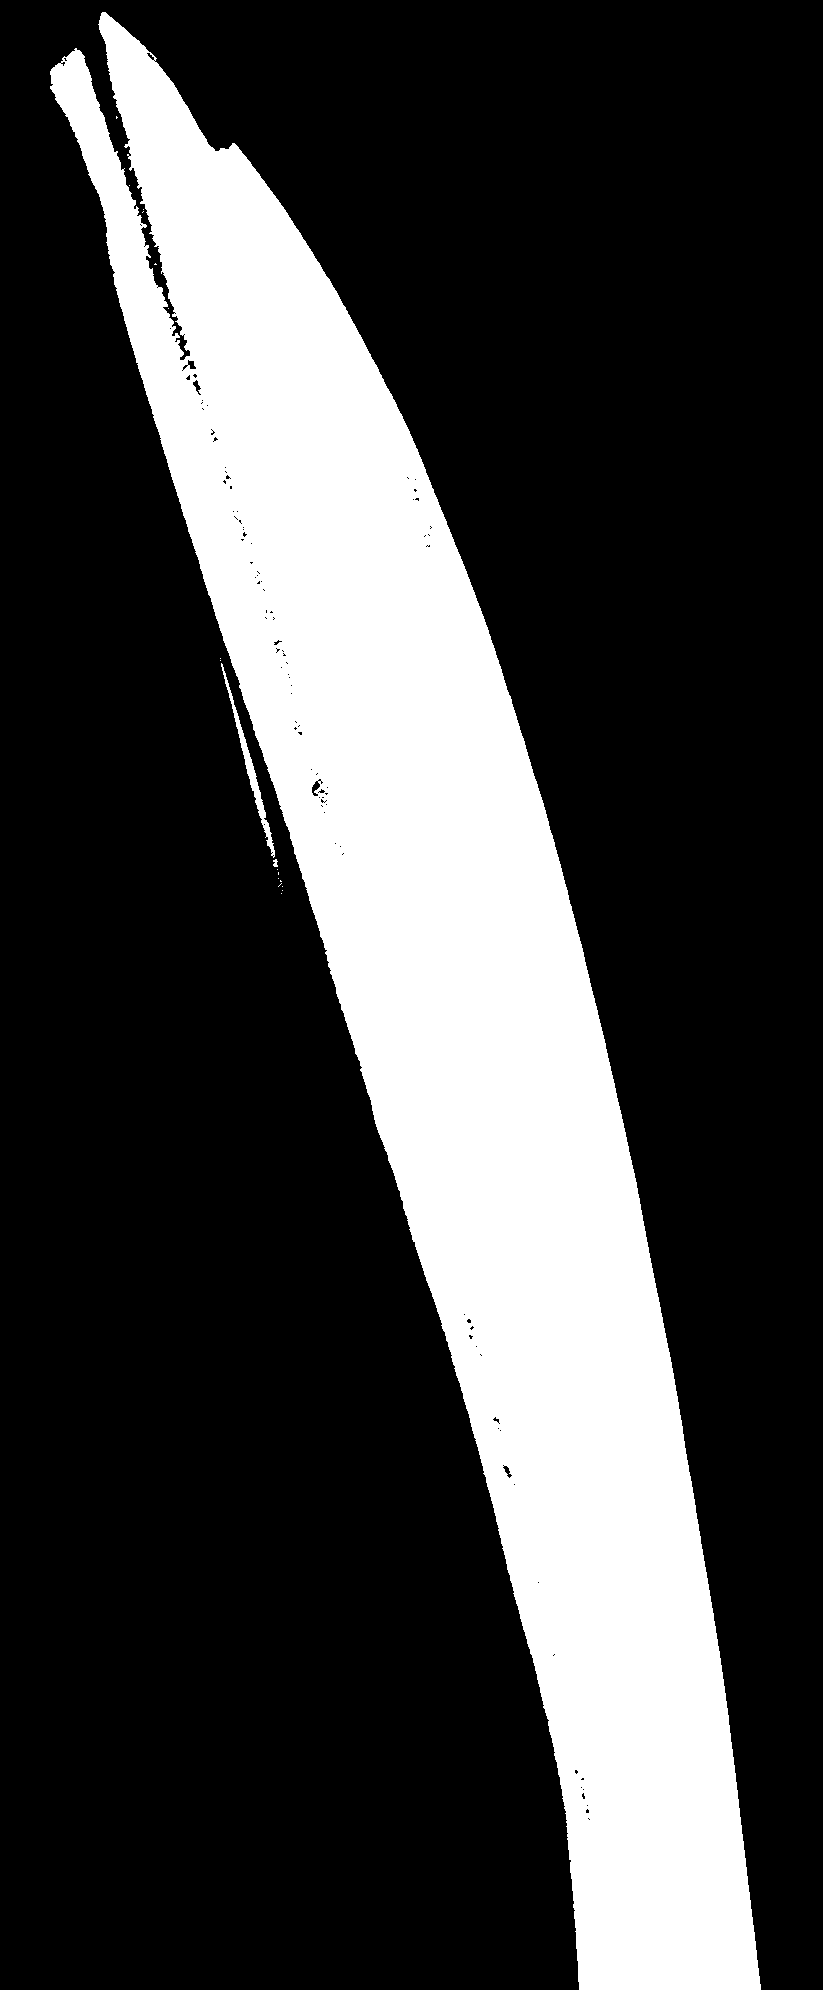

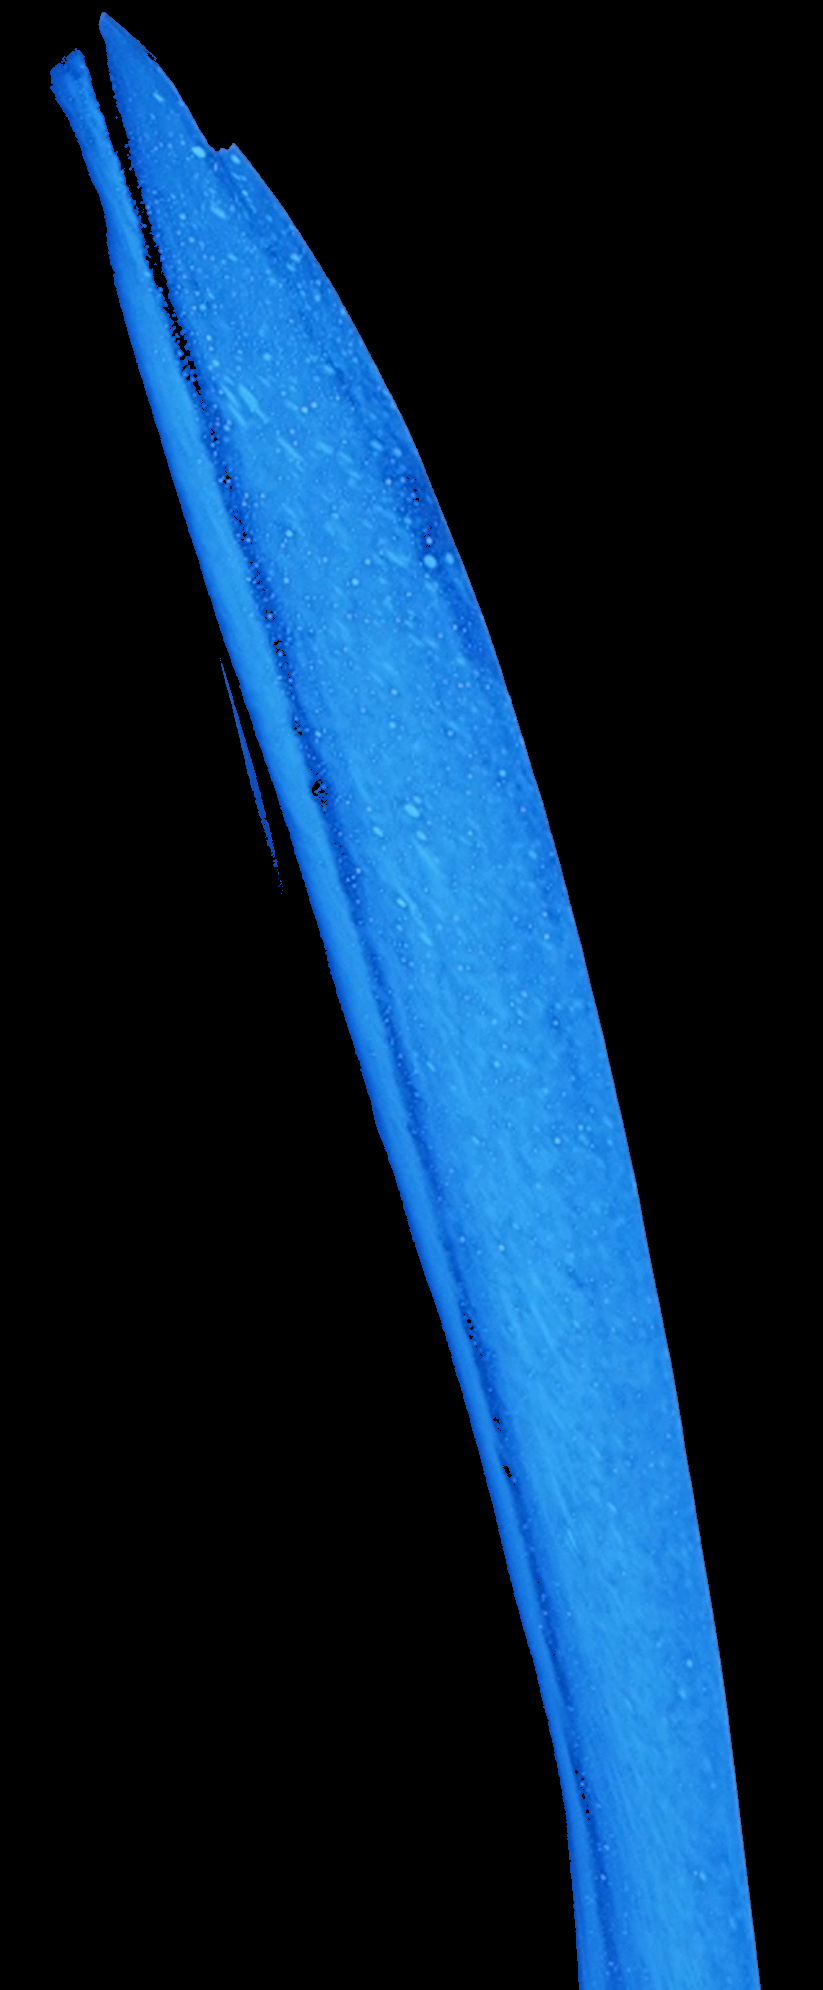

In [13]:
# cv2_imshow(image_rgb_cv)

mean_rgb = np.mean(image_rgb_cv, axis=(0, 1))
print("Μέσο RGB:", mean_rgb)

# mask_r = cv2.inRange(image_rgb_cv[:,:,0],0,20)
# mask_g = cv2.inRange(image_rgb_cv[:,:,1],0,70)
# mask_b = cv2.inRange(image_rgb_cv[:,:,2],0,130)
# cv2_imshow(mask_b)
# mask_r = cv2.bitwise_not(mask_r)
# mask_g = cv2.bitwise_not(mask_r)
# mask_b = cv2.bitwise_not(mask_r)

# result = cv2.bitwise_and(image_rgb_cv,image_rgb_cv,mask = mask_r & mask_g & mask_b) # ???????????????????????????????????????????
# cv2_imshow(result)


min_rgb = np.array([0, 0, 0])
max_rgb = np.array([255, 70, 130])
mask = cv2.inRange(image_rgb_cv, min_rgb, max_rgb)
inverted_mask = cv2.bitwise_not(mask)
cv2_imshow(inverted_mask)

image_rgb_masked = cv2.bitwise_and(image_rgb_cv, image_rgb_cv, mask=inverted_mask)
cv2_imshow(image_rgb_masked)

## **Step 6**

In [ ]:
sample_xyz = cv2.cvtColor(image_rgb_masked, cv2.COLOR_RGB2XYZ)

Xs = sample_xyz[:, :, 0]
Ys = sample_xyz[:, :, 1]
Zs = sample_xyz[:, :, 2]

s_image = Xs + Ys + Zs
with np.errstate(divide='ignore', invalid='ignore'):
    x_image = Xs / s_image
    y_image = Ys / s_image

x_img = []
y_img = []

# mask = ~np.isnan(x_image) & ~np.isnan(y_image)
# x_img = x_image[mask]
# y_img = y_image[mask]

print(x_img)
# print(y_img)
# for T, (X, Y, Z) in zip(temps, zip(Χs, Ys, Zs)):
# for x, y, x_img, y_img in zip(curves_x, curves_y, x_image, y_image):
#     if not (np.isnan(x) or np.isnan(y)):
#        x = round(1000 * x)
#        y = round(1000 * y)


## **Step 7**

### 7.1 Histogram

In [ ]:
print(Image_x_y)

temperature_values = [image_result[y][x][0] for x, y in Image_x_y]  # Red channel

# Plot histogram
plt.hist(temperature_values, bins=20, color='orange', edgecolor='black')
plt.xlabel('Temperature Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 7.1 Heatmap

In [ ]:
height, width, channel = image_result.shape

heatmap = np.zeros((height, width), dtype=np.float32)

for x, y in Image_x_y:
    if 0 <= x < width and 0 <= y < height:
        heatmap[y, x] += 1  # Note: y first because of row-major order

heatmap_blur = cv2.GaussianBlur(image_result,(3,3), 11)
colored_heatmap = cv2.applyColorMap(np.uint8(255 * heatmap_blur), cv2.COLORMAP_JET)

plt.imshow(colored_heatmap)
plt.axis('off')
plt.show()

In [ ]:
plt.imshow(colored_heatmap)
plt.imshow(colored_heatmap, cmap='jet', origin='upper')  # bottom-left
plt.colorbar()
plt.axis('off')
plt.show()

In [ ]:
image = cv2.resize(image_result, (width, height))

overlay = cv2.addWeighted(image, 0.6, colored_heatmap, 0.4, 0)

plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
blur = cv2.GaussianBlur(image_rgb,(3,3), 11)
cv2_imshow(blur)

In [ ]:
heatmap_img = cv2.applyColorMap(blur, cv2.COLORMAP_JET)
cv2_imshow(heatmap_img)

In [ ]:
super_imposed_img = cv2.addWeighted(heatmap_img, 0.5, image_rgb, 0.5, 0)
cv2_imshow(super_imposed_img)